In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
time=pd.read_excel('data/시간대별 교통량.xlsx')
time

,노선명,구간명,날짜,월,요일,00~01시,01~02시,02~03시,03~04시,04~05시,...,15~16시,16~17시,17~18시,18~19시,19~20시,20~21시,21~22시,22~23시,23~24시,전일합계(대)
0,중부고속도로,산곡JC-경기광주IC,2022-01-01,1,토,501,510,379,417,520,...,1955,1635,1376,983,814,809,818,518,343,29179
1,중부고속도로,동서울TG-산곡JC,2022-01-01,1,토,954,1042,843,1006,1126,...,3219,2865,2223,1717,1437,1377,1236,874,562,52431
2,중부고속도로,하남IC-동서울TG,2022-01-01,1,토,1007,1084,860,1036,1130,...,3740,3274,2570,1879,1546,1522,1401,933,578,58603
3,중부고속도로,산곡JC-경기광주IC,2022-01-02,1,일,230,183,157,157,200,...,2228,2138,1703,1407,1174,1199,1111,704,430,26010
4,중부고속도로,동서울TG-산곡JC,2022-01-02,1,일,345,270,190,211,306,...,4018,4225,3253,2633,2445,2421,2043,1486,845,48577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,중부고속도로,동서울TG-산곡JC,2022-12-30,12,금,588,424,386,410,616,...,4477,4437,4203,4017,3297,2889,2327,1818,1154,70012
1064,중부고속도로,하남IC-동서울TG,2022-12-30,12,금,604,440,380,400,685,...,4787,4845,4857,3963,3531,2996,2397,1837,1177,73898
1065,중부고속도로,산곡JC-경기광주IC,2022-12-31,12,토,476,382,285,273,355,...,2203,2217,1948,1382,1132,973,863,608,461,32190
1066,중부고속도로,동서울TG-산곡JC,2022-12-31,12,토,781,503,412,469,656,...,3950,3823,3102,2389,1866,1696,1444,1200,760,57851


In [3]:
#숫자가 object로 저장되어있어서 변경함
for i in range(0,24):
    j=i+1
    if j<10:
        j='0'+str(j)  
    if i <10:
        i='0'+str(i)

    try:
        time[f'{i}~{j}시'] = time[f'{i}~{j}시'].astype(int)
    except:
        print(i,'오류가 발생했습니다')
        time[f'{i}~{j}시'] = pd.to_numeric(time[f'{i}~{j}시'], errors='coerce')
        time = time.dropna(subset=[f'{i}~{j}시'])
        time[f'{i}~{j}시'] = time[f'{i}~{j}시'].astype(int)
        print(i,'int로 수정하여 저장했습니다.')

00 오류가 발생했습니다
00 int로 수정하여 저장했습니다.
02 오류가 발생했습니다
02 int로 수정하여 저장했습니다.
03 오류가 발생했습니다
03 int로 수정하여 저장했습니다.
04 오류가 발생했습니다
04 int로 수정하여 저장했습니다.
07 오류가 발생했습니다
07 int로 수정하여 저장했습니다.
10 오류가 발생했습니다
10 int로 수정하여 저장했습니다.
15 오류가 발생했습니다
15 int로 수정하여 저장했습니다.
19 오류가 발생했습니다
19 int로 수정하여 저장했습니다.
21 오류가 발생했습니다
21 int로 수정하여 저장했습니다.
23 오류가 발생했습니다
23 int로 수정하여 저장했습니다.


/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/174244395.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time[f'{i}~{j}시'] = time[f'{i}~{j}시'].astype(int)
/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/174244395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time[f'{i}~{j}시'] = time[f'{i}~{j}시'].astype(int)
/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/174244395.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

# 도로별로 나누기

In [4]:
time.rename(columns={'00~01시':'00','01~02시':'01','02~03시':'02','03~04시':'03','04~05시':'04','05~06시':'05',
                     '06~07시':'06','07~08시':'07','08~09시':'08','09~10시':'09','10~11시':'10','11~12시':'11',
                     '12~13시':'12','13~14시':'13','14~15시':'14','15~16시':'15','16~17시':'16','17~18시':'17',
                     '18~19시':'18','19~20시':'19','20~21시':'20','21~22시':'21','22~23시':'22','23~24시':'23'},
            inplace=True)

In [5]:
time['구간명'].unique()

array(['산곡JC-경기광주IC', '동서울TG-산곡JC', '하남IC-동서울TG'], dtype=object)

In [6]:
time_hd=time[time['구간명']=='하남IC-동서울TG'].copy()
time_hd.drop(columns=['노선명'],inplace=True)
time_ds=time[time['구간명']=='동서울TG-산곡JC'].copy()
time_ds.drop(columns=['노선명'],inplace=True)
time_sg=time[time['구간명']=='산곡JC-경기광주IC'].copy()
time_sg.drop(columns=['노선명'],inplace=True)

# 단일 변수 분석

In [7]:
#print('하남IC-동서울TG')
#time_hd.describe()
#print('동서울TG-산곡JC')
#time_ds.describe()
print('산곡JC-경기광주IC')
time_sg[['06','07','08','09']].describe().round(2)

산곡JC-경기광주IC


,06,07,08,09
count,344.00,344.00,344.00,344.00
mean,2208.42,2562.65,2523.06,2450.25
std,613.67,652.55,564.20,367.79
min,391.00,640.00,755.00,1019.00
25%,1880.00,2427.75,2271.00,2284.25
50%,2450.00,2778.00,2748.50,2531.50
75%,2668.25,3040.25,2928.00,2706.25
max,3039.00,3202.00,3160.00,3004.00


In [8]:
print('하남IC-동서울TG')
time_hd[['06','07','08','09']].describe().round(2)


하남IC-동서울TG


,06,07,08,09
count,337.00,337.00,337.00,337.00
mean,4234.11,4718.79,4385.79,4480.55
std,1052.27,1033.04,728.46,501.89
min,914.00,1435.00,1602.00,2352.00
25%,3513.00,4463.00,4212.00,4266.00
50%,4605.00,5013.00,4632.00,4578.00
75%,4963.00,5482.00,4872.00,4872.00
max,5862.00,5901.00,5535.00,5288.00


# 월별 교통량

In [9]:
time_target=time[['구간명','월','06','07','08','09']]
time_target

,구간명,월,06,07,08,09
0,산곡JC-경기광주IC,1,761,1255,1466,1933
1,동서울TG-산곡JC,1,1747,2483,2830,3589
2,하남IC-동서울TG,1,1897,2757,3128,4064
3,산곡JC-경기광주IC,1,397,666,915,1180
4,동서울TG-산곡JC,1,859,1378,1745,2271
...,...,...,...,...,...,...
1063,동서울TG-산곡JC,12,2976,4157,4017,4217
1064,하남IC-동서울TG,12,3289,4543,4131,4386
1065,산곡JC-경기광주IC,12,1284,1664,1789,1920
1066,동서울TG-산곡JC,12,2676,3230,3430,3679


In [10]:
print('월별 교통량 (06~10시)')
time_target2=time_target.groupby(['월']).mean().round(2)
time_target2

월별 교통량 (06~10시)


/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/2399111193.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_target2=time_target.groupby(['월']).mean().round(2)


,06,07,08,09
월,,,,
1,2654.58,3557.23,3680.04,3579.32
2,2596.90,3483.72,3506.76,3473.24
3,3033.64,3612.14,3305.13,3290.30
4,3607.36,3992.24,3794.21,3757.81
5,3724.01,3956.77,3733.66,3703.01
6,3509.09,3719.68,3532.81,3551.15
7,3475.80,3763.99,3560.85,3473.38
8,3765.80,4159.97,3948.42,3879.22
9,3840.36,4219.35,4030.91,4025.33


월별 교통량 (06~10시)


<Figure size 640x480 with 0 Axes>

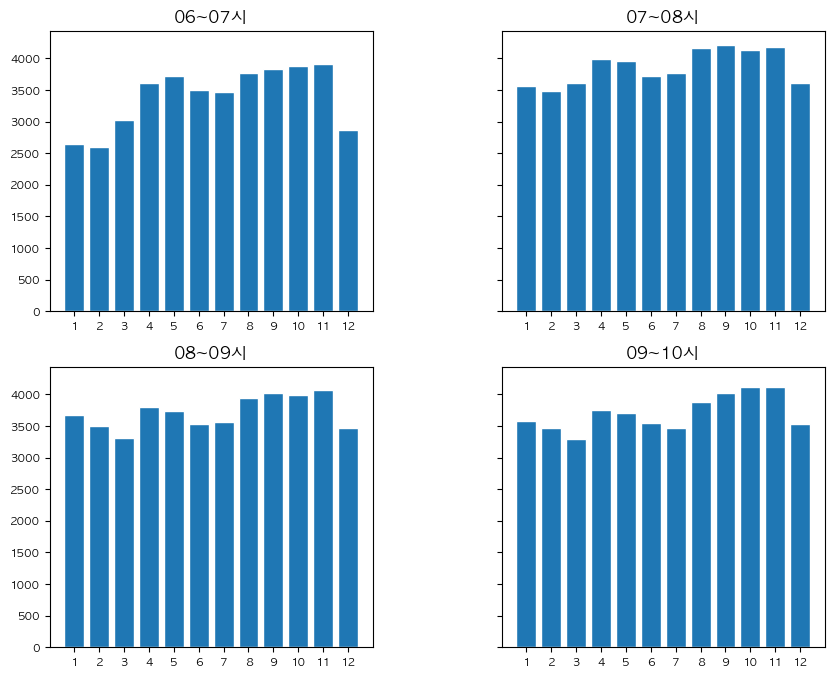

In [11]:
# 등교시간인 06~09시 월별 교통량
print('월별 교통량 (06~10시)')

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

fg=plt.figure()
fg,ax=plt.subplots(2,2,sharey=True,figsize=(10,8))
sns.set(style="whitegrid")


ax[0,0].bar(x=time_target2.index,height=time_target2['06'])
ax[0,0].set_title("06~07시")
ax[0,0].set_xticks(range(1,13))

ax[0,1].bar(x=time_target2.index,height=time_target2['07'])
ax[0,1].set_title("07~08시")
ax[0,1].set_xticks(range(1,13))
ax[1,0].bar(x=time_target2.index,height=time_target2['08'])
ax[1,0].set_title("08~09시")
ax[1,0].set_xticks(range(1,13))
ax[1,1].bar(x=time_target2.index,height=time_target2['09'])
ax[1,1].set_title("09~10시")
ax[1,1].set_xticks(range(1,13))

plt.subplots_adjust(wspace=0.4)  # subplot 간 간격 조절

plt.show()

In [12]:
time_target2=time_target.groupby(['월','구간명']).mean().round(2)
time_target2

06       07       08       09
월  구간명                                            
1  동서울TG-산곡JC   2931.52  3882.33  4065.70  3982.04
   산곡JC-경기광주IC  1700.37  2355.04  2468.81  2377.41
   하남IC-동서울TG   3331.85  4434.33  4505.59  4378.52
2  동서울TG-산곡JC   2822.12  3749.08  3810.81  3797.85
   산곡JC-경기광주IC  1661.65  2301.19  2404.04  2274.88
   하남IC-동서울TG   3306.92  4400.88  4305.42  4347.00
3  동서울TG-산곡JC   3151.47  3735.77  3474.73  3460.50
   산곡JC-경기광주IC  2004.40  2470.03  2335.43  2184.07
   하남IC-동서울TG   3945.07  4630.63  4105.23  4226.33
4  동서울TG-산곡JC   3711.40  4143.90  3993.67  3929.90
   산곡JC-경기광주IC  2412.97  2769.07  2692.30  2567.27
   하남IC-동서울TG   4697.70  5063.77  4696.67  4776.27
5  동서울TG-산곡JC   3823.40  4137.50  3970.00  3880.37
   산곡JC-경기광주IC  2503.43  2737.47  2641.47  2584.60
   하남IC-동서울TG   4845.20  4995.33  4589.50  4644.07
6  동서울TG-산곡JC   3686.18  3955.86  3828.79  3757.46
   산곡JC-경기광주IC  2376.50  2622.68  2520.96  2518.89
   하남IC-동서울TG   4672.30  4767.65  4404.30  4556.65
7  동서울TG-산곡JC   3623.10  3915.33  3771.13  3666.40
   산곡JC-경기광주IC  2353.27  2600.20  2541.23  2391.20
   하남IC-동서울TG   4520.68  4848.75  4428.00  4426.04
8  동서울TG-산곡JC   4480.07  4936.87  4799.90  4678.03
   산곡JC-경기광주IC  2336.90  2665.10  2577.67  2456.77
   하남IC-동서울TG   4480.43  4877.93  4467.70  4502.87
9  동서울TG-산곡JC   4699.83  5163.52  5072.91  5011.13
   산곡JC-경기광주IC  2361.17  2649.61  2625.96  2551.74
   하남IC-동서울TG   4460.09  4844.91  4393.87  4513.13
10 동서울TG-산곡JC   4688.76  5126.90  5124.59  5144.24
   산곡JC-경기광주IC  2448.59  2600.93  2524.97  2620.31
   하남IC-동서울TG   4506.48  4685.83  4334.72  4601.62
11 동서울TG-산곡JC   4665.47  5129.93  5099.10  5033.27
   산곡JC-경기광주IC  2451.40  2657.97  2662.93  2617.70
   하남IC-동서울TG   4630.83  4777.50  4455.90  4720.23
12 동서울TG-산곡JC   3385.35  4234.68  4173.52  4269.23
   산곡JC-경기광주IC  1834.00  2301.16  2291.26  2267.52
   하남IC-동서울TG   3408.61  4289.84  3965.13  4084.81

HanamIC-DongseoulTG 의 월별 교통량


<Figure size 640x480 with 0 Axes>

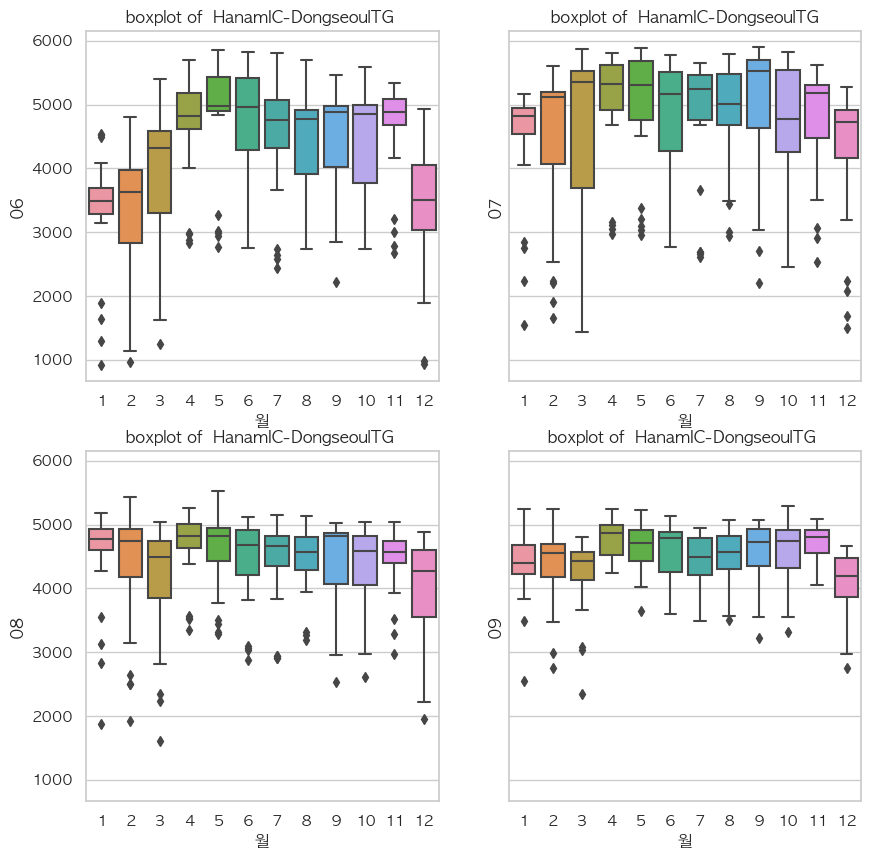

In [13]:
# 등교시간인 06~09시 월별 교통량
print('HanamIC-DongseoulTG 의 월별 교통량')
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

fg=plt.figure()
fg,ax=plt.subplots(2,2,sharey=True,figsize=(10,10))
sns.set(style="whitegrid")


sns.boxplot(data=time_hd,x='월',y='06',ax=ax[0,0])
ax[0,0].set_title("boxplot of  HanamIC-DongseoulTG ")
sns.boxplot(data=time_hd,x='월',y='07',ax=ax[0,1])
ax[0,1].set_title("boxplot of  HanamIC-DongseoulTG")
sns.boxplot(data=time_hd,x='월',y='08',ax=ax[1,0])
ax[1,0].set_title("boxplot of  HanamIC-DongseoulTG ")
sns.boxplot(data=time_hd,x='월',y='09',ax=ax[1,1])
ax[1,1].set_title("boxplot of  HanamIC-DongseoulTG ")

plt.show()

DongseoulTG-SangokJC 의 월별 교통량


<Figure size 640x480 with 0 Axes>

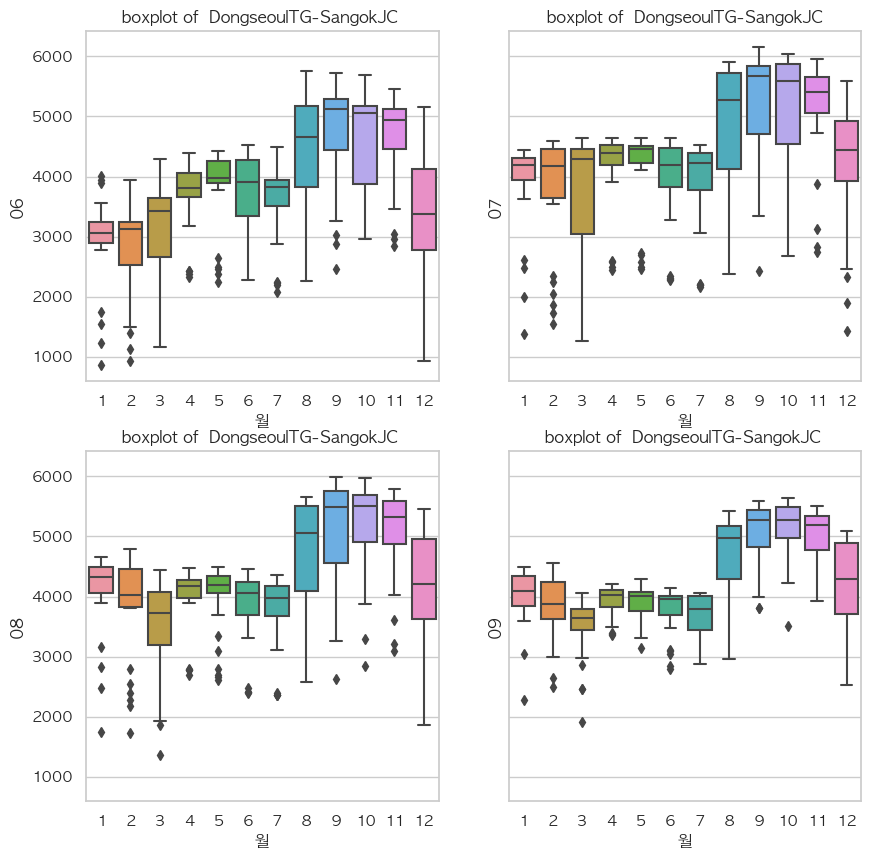

In [14]:
# 등교시간인 06~09시 월별 교통량
print('DongseoulTG-SangokJC 의 월별 교통량')
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

fg=plt.figure()
fg,ax=plt.subplots(2,2,sharey=True,figsize=(10,10))
sns.set(style="whitegrid")


sns.boxplot(data=time_ds,x='월',y='06',ax=ax[0,0])
ax[0,0].set_title("boxplot of  DongseoulTG-SangokJC ")
sns.boxplot(data=time_ds,x='월',y='07',ax=ax[0,1])
ax[0,1].set_title("boxplot of  DongseoulTG-SangokJC")
sns.boxplot(data=time_ds,x='월',y='08',ax=ax[1,0])
ax[1,0].set_title("boxplot of  DongseoulTG-SangokJC ")
sns.boxplot(data=time_ds,x='월',y='09',ax=ax[1,1])
ax[1,1].set_title("boxplot of  DongseoulTG-SangokJC ")

plt.show()

SangokJC - Gyeonggi-GwangjuIC 의 월별 교통량


<Figure size 640x480 with 0 Axes>

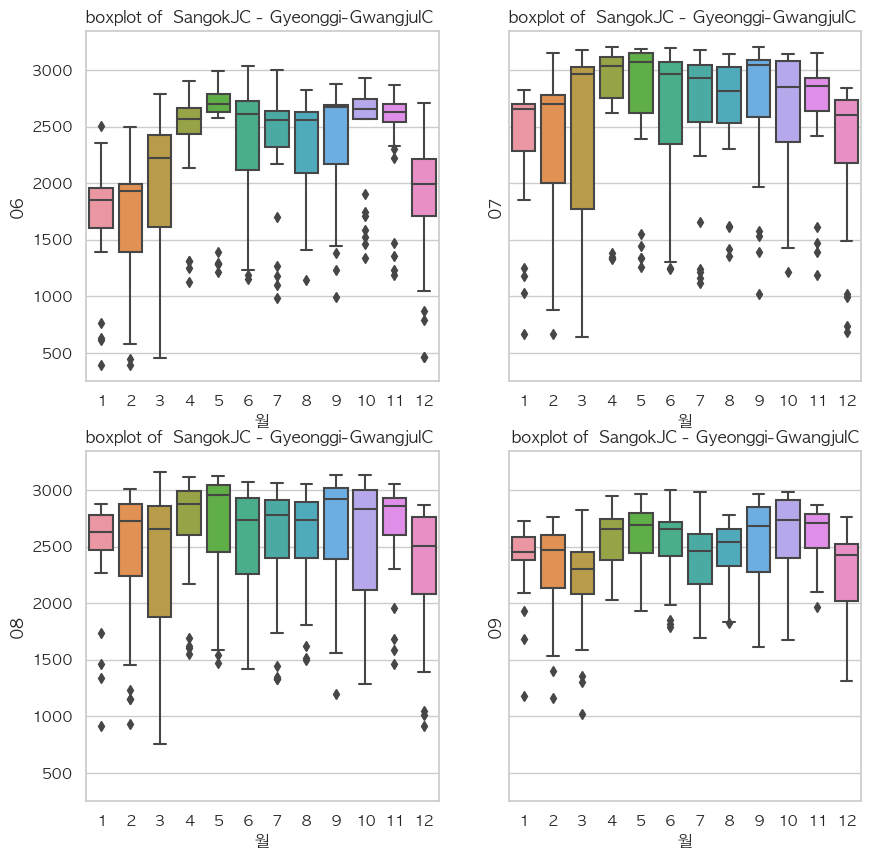

In [15]:
# 등교시간인 06~09시 월별 교통량
print('SangokJC - Gyeonggi-GwangjuIC 의 월별 교통량')
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

fg=plt.figure()
fg,ax=plt.subplots(2,2,sharey=True,figsize=(10,10))
sns.set(style="whitegrid")


sns.boxplot(data=time_sg,x='월',y='06',ax=ax[0,0])
ax[0,0].set_title("boxplot of  SangokJC - Gyeonggi-GwangjuIC ")
sns.boxplot(data=time_sg,x='월',y='07',ax=ax[0,1])
ax[0,1].set_title("boxplot of  SangokJC - Gyeonggi-GwangjuIC ")
sns.boxplot(data=time_sg,x='월',y='08',ax=ax[1,0])
ax[1,0].set_title("boxplot of  SangokJC - Gyeonggi-GwangjuIC ")
sns.boxplot(data=time_sg,x='월',y='09',ax=ax[1,1])
ax[1,1].set_title("boxplot of  SangokJC - Gyeonggi-GwangjuIC")

plt.show()

# 월별 차이가 유의미한지 통계적 분석

In [16]:
from statsmodels.stats.oneway import anova_oneway

In [17]:
print('06시 기준')
A=time[time['월']==1]['06']
B=time[time['월']==2]['06']
C=time[time['월']==3]['06']
D=time[time['월']==4]['06']
E=time[time['월']==5]['06']
F=time[time['월']==6]['06']
G=time[time['월']==7]['06']
H=time[time['월']==8]['06']
I=time[time['월']==9]['06']
J=time[time['월']==10]['06']
K=time[time['월']==11]['06']
L=time[time['월']==12]['06']
anova_oneway([A,B,C,D,E,F,G,H,I,J,K,L], use_var="equal")

06시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 14.128225454759448
pvalue = 1.4105901377983216e-25
df = (11.0, 1013.0)
df_num = 11.0
df_denom = 1013.0
nobs_t = 1025.0
n_groups = 12
means = array([2654.58024691, 2596.8974359 , 3033.64444444, 3607.35555556,
           3724.01111111, 3509.08860759, 3475.79545455, 3765.8       ,
           3840.36231884, 3881.27586207, 3915.9       , 2875.98924731])
nobs = array([81., 78., 90., 90., 90., 79., 88., 90., 69., 87., 90., 93.])
vars_ = array([1028785.74660494, 1252528.22311022, 1347808.56878901,
           1301769.24294632, 1433324.2133583 , 1415953.67153522,
           1301164.04963427, 1511771.98202247, 1840880.20502984,
           1575618.50441058, 1500775.77640449, 1312049.33683964])
use_var = 'equal'
welch_correction = True
tuple = (14.128225454759448, 1.4105901377983216e-25)

In [18]:
print('07시 기준')
A=time[time['월']==1]['07']
B=time[time['월']==2]['07']
C=time[time['월']==3]['07']
D=time[time['월']==4]['07']
E=time[time['월']==5]['07']
F=time[time['월']==6]['07']
G=time[time['월']==7]['07']
H=time[time['월']==8]['07']
I=time[time['월']==9]['07']
J=time[time['월']==10]['07']
K=time[time['월']==11]['07']
L=time[time['월']==12]['07']
anova_oneway([A,B,C,D,E,F,G,H,I,J,K,L], use_var="equal")

07시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 3.6519232604016514
pvalue = 4.2377267717054754e-05
df = (11.0, 1013.0)
df_num = 11.0
df_denom = 1013.0
nobs_t = 1025.0
n_groups = 12
means = array([3557.2345679 , 3483.71794872, 3612.14444444, 3992.24444444,
           3956.76666667, 3719.6835443 , 3763.98863636, 4159.96666667,
           4219.34782609, 4137.88505747, 4188.46666667, 3608.55913978])
nobs = array([81., 78., 90., 90., 90., 79., 88., 90., 69., 87., 90., 93.])
vars_ = array([1392628.08179012, 1839996.77655678, 1978625.94519351,
           1397831.1980025 , 1466417.77640449, 1430342.11652061,
           1491487.50561651, 1708648.86404494, 2199001.99488491,
           2010994.0098904 , 1748170.74606742, 1743812.22744273])
use_var = 'equal'
welch_correction = True
tuple = (3.6519232604016514, 4.2377267717054754e-05)

In [19]:
print('08시 기준')
A=time[time['월']==1]['08']
B=time[time['월']==2]['08']
C=time[time['월']==3]['08']
D=time[time['월']==4]['08']
E=time[time['월']==5]['08']
F=time[time['월']==6]['08']
G=time[time['월']==7]['08']
H=time[time['월']==8]['08']
I=time[time['월']==9]['08']
J=time[time['월']==10]['08']
K=time[time['월']==11]['08']
L=time[time['월']==12]['08']
anova_oneway([A,B,C,D,E,F,G,H,I,J,K,L], use_var="equal")

08시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 4.2949800758867385
pvalue = 2.769454538813287e-06
df = (11.0, 1013.0)
df_num = 11.0
df_denom = 1013.0
nobs_t = 1025.0
n_groups = 12
means = array([3680.03703704, 3506.75641026, 3305.13333333, 3794.21111111,
           3733.65555556, 3532.81012658, 3560.85227273, 3948.42222222,
           4030.91304348, 3994.75862069, 4072.64444444, 3476.6344086 ])
nobs = array([81., 78., 90., 90., 90., 79., 88., 90., 69., 87., 90., 93.])
vars_ = array([1215215.88611111, 1384909.27755578, 1199752.09438202,
            946974.84257179, 1020634.40811486, 1015588.87374229,
            993761.11585684, 1355386.58377029, 1646261.19820972,
           1667967.55733761, 1381253.40024969, 1316577.88662927])
use_var = 'equal'
welch_correction = True
tuple = (4.2949800758867385, 2.769454538813287e-06)

In [20]:
print('09시 기준')
A=time[time['월']==1]['09']
B=time[time['월']==2]['09']
C=time[time['월']==3]['09']
D=time[time['월']==4]['09']
E=time[time['월']==5]['09']
F=time[time['월']==6]['09']
G=time[time['월']==7]['09']
H=time[time['월']==8]['09']
I=time[time['월']==9]['09']
J=time[time['월']==10]['09']
K=time[time['월']==11]['09']
L=time[time['월']==12]['09']
anova_oneway([A,B,C,D,E,F,G,H,I,J,K,L], use_var="equal")

09시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 6.054884441801894
pvalue = 1.1800125805166658e-09
df = (11.0, 1013.0)
df_num = 11.0
df_denom = 1013.0
nobs_t = 1025.0
n_groups = 12
means = array([3579.32098765, 3473.24358974, 3290.3       , 3757.81111111,
           3703.01111111, 3551.15189873, 3473.375     , 3879.22222222,
           4025.33333333, 4122.05747126, 4123.73333333, 3540.51612903])
nobs = array([81., 78., 90., 90., 90., 79., 88., 90., 69., 87., 90., 93.])
vars_ = array([ 964483.09567901, 1056392.05677656,  962537.33595506,
            908392.15493134,  834827.89875156,  853049.64329763,
            854959.45545977, 1258536.84893883, 1404012.01960784,
           1380475.61293772, 1255631.86067416, 1108828.53506311])
use_var = 'equal'
welch_correction = True
tuple = (6.054884441801894, 1.1800125805166658e-09)

# 요일별 차이가 유의미한지 통계적 분석

In [60]:
print('06시 기준')
A=time[time['요일']=='월']['06']
B=time[time['요일']=='화']['06']
C=time[time['요일']=='수']['06']
D=time[time['요일']=='목']['06']
E=time[time['요일']=='금']['06']
F=time[time['요일']=='토']['06']
G=time[time['요일']=='일']['06']
anova_oneway([A,B,C,D,E,F,G], use_var="equal")

06시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 2.415622640138179
pvalue = 0.034574458571767754
df = (5.0, 869.0)
df_num = 5.0
df_denom = 869.0
nobs_t = 875.0
n_groups = 6
means = array([3905.71328671, 3545.64285714, 3466.23239437, 3645.14925373,
           3584.13422819, 3654.44444444])
nobs = array([143., 154., 142., 134., 149., 153.])
vars_ = array([1530231.8538363 , 1226787.69514472, 1285190.69029068,
           1128872.53394681, 1098987.68456376, 1756276.34064327])
use_var = 'equal'
welch_correction = True
tuple = (2.415622640138179, 0.034574458571767754)

In [59]:
print('07시 기준')
A=time[time['요일']=='월']['07']
B=time[time['요일']=='화']['07']
C=time[time['요일']=='수']['07']
D=time[time['요일']=='목']['07']
E=time[time['요일']=='금']['07']
F=time[time['요일']=='토']['07']
G=time[time['요일']=='일']['07']
anova_oneway([A,B,C,D,E,F,G], use_var="equal")

07시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 57.10986688699086
pvalue = 6.129711456921684e-61
df = (6.0, 1018.0)
df_num = 6.0
df_denom = 1018.0
nobs_t = 1025.0
n_groups = 7
means = array([4011.4965035 , 4243.86363636, 4158.91549296, 4363.38059701,
           4260.18791946, 3771.12418301, 2328.89333333])
nobs = array([143., 154., 142., 134., 149., 153., 150.])
vars_ = array([1395285.39259332, 1425333.97474747, 1507576.92897812,
           1309074.85405678, 1237852.81579902, 1345357.38579291,
            967688.76706935])
use_var = 'equal'
welch_correction = True
tuple = (57.10986688699086, 6.129711456921684e-61)

In [57]:
print('08시 기준')
A=time[time['요일']=='월']['08']
B=time[time['요일']=='화']['08']
C=time[time['요일']=='수']['08']
D=time[time['요일']=='목']['08']
E=time[time['요일']=='금']['08']
F=time[time['요일']=='토']['08']
G=time[time['요일']=='일']['08']
anova_oneway([A,B,C,D,E,F,G], use_var="equal")

08시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 36.12393815245057
pvalue = 8.764550565241019e-40
df = (6.0, 1018.0)
df_num = 6.0
df_denom = 1018.0
nobs_t = 1025.0
n_groups = 7
means = array([3861.46853147, 4007.37662338, 3957.35211268, 4075.32089552,
           3926.54362416, 3636.64052288, 2607.35333333])
nobs = array([143., 154., 142., 134., 149., 153., 150.])
vars_ = array([1103379.23667881, 1104400.98141075, 1168340.54180402,
           1003104.03910897,  954863.92544894, 1191443.48176815,
           1013253.97498881])
use_var = 'equal'
welch_correction = True
tuple = (36.12393815245057, 8.764550565241019e-40)

In [55]:
print('09시 기준')
A=time[time['요일']=='월']['09']
B=time[time['요일']=='화']['09']
C=time[time['요일']=='수']['09']
D=time[time['요일']=='목']['09']
E=time[time['요일']=='금']['09']
F=time[time['요일']=='토']['09']
G=time[time['요일']=='일']['09']
anova_oneway([A,B,C,D,E,F,G], use_var="equal")

09시 기준


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 8.340836756984642
pvalue = 7.63209920978171e-09
df = (6.0, 1018.0)
df_num = 6.0
df_denom = 1018.0
nobs_t = 1025.0
n_groups = 7
means = array([3700.62237762, 3889.38961039, 3791.0915493 , 3911.08208955,
           3829.63087248, 3663.14379085, 3192.58      ])
nobs = array([143., 154., 142., 134., 149., 153., 150.])
vars_ = array([ 958991.89865065, 1051211.93871488, 1127127.28943163,
           1093924.37666929, 1086219.41012153,  994582.32129343,
           1234315.65463087])
use_var = 'equal'
welch_correction = True
tuple = (8.340836756984642, 7.63209920978171e-09)

# 요일별 그래프

In [25]:
print('요일별 교통량 (06~10시)')
time_target3=time.groupby(['요일']).mean().round(2)
time_target3=time_target3[['06','07','08','09']]
time_target3=time_target3.transpose()
time_target3=time_target3[['월','화','수','목','금','토','일']]
time_target3=time_target3.transpose()
time_target3

요일별 교통량 (06~10시)


/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/71811092.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_target3=time.groupby(['요일']).mean().round(2)


,06,07,08,09
요일,,,,
월,3905.71,4011.50,3861.47,3700.62
화,3545.64,4243.86,4007.38,3889.39
수,3466.23,4158.92,3957.35,3791.09
목,3645.15,4363.38,4075.32,3911.08
금,3584.13,4260.19,3926.54,3829.63
토,3654.44,3771.12,3636.64,3663.14
일,2110.85,2328.89,2607.35,3192.58


요일별 교통량 (06~10시)


<Figure size 640x480 with 0 Axes>

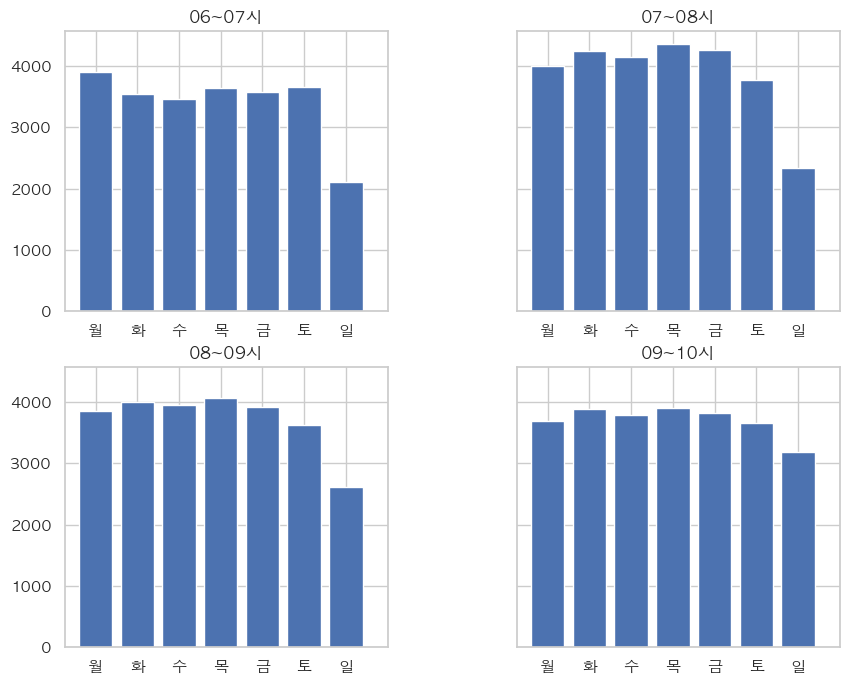

In [26]:
# 등교시간인 06~09시 월별 교통량
print( '요일별 교통량 (06~10시)')

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

fg=plt.figure()
fg,ax=plt.subplots(2,2,sharey=True,figsize=(10,8))
sns.set(style="whitegrid")


ax[0,0].bar(x=time_target3.index,height=time_target3['06'])
ax[0,0].set_title("06~07시")
ax[0,0].set_xticks(range(0,8))

ax[0,1].bar(x=time_target3.index,height=time_target3['07'])
ax[0,1].set_title("07~08시")
ax[0,1].set_xticks(range(0,8))
ax[1,0].bar(x=time_target3.index,height=time_target3['08'])
ax[1,0].set_title("08~09시")
ax[1,0].set_xticks(range(0,8))
ax[1,1].bar(x=time_target3.index,height=time_target3['09'])
ax[1,1].set_title("09~10시")
ax[1,1].set_xticks(range(0,8))

plt.subplots_adjust(wspace=0.4)  # subplot 간 간격 조절

plt.show()

In [27]:
time_target3=time.groupby(['요일']).mean().round(2)
time_target3=time_target3[['06','07','08','09']]
time_target3=time_target3.transpose()
time_target3=time_target3[['월','화','수','목','금','토','일']].mean().round(2)
time_target3=time_target3.transpose()
time_target3

/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/2386687982.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_target3=time.groupby(['요일']).mean().round(2)


요일
월    3869.82
화    3921.57
수    3843.40
목    3998.73
금    3900.12
토    3681.33
일    2559.92
dtype: float64

요일별 교통량 (06~10시 통합)


<BarContainer object of 7 artists>

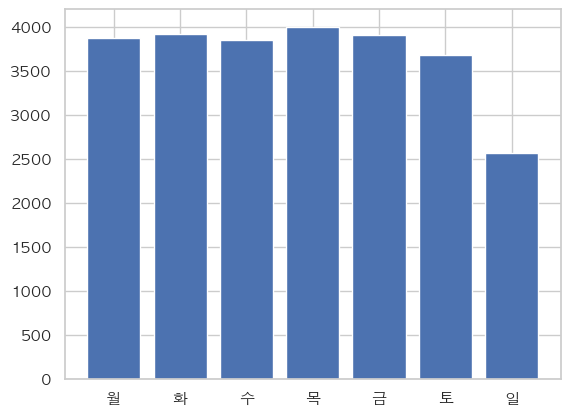

In [28]:
print( '요일별 교통량 (06~10시 통합)')
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

plt.bar(x=time_target3.index,height=time_target3.values)

In [29]:
time_target3=time.groupby(['요일']).mean().round(2)
time_target3=time_target3[['00', '01', '02', '03', '04', '05', '06','07', '08', '09', '10', 
                           '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23']]
time_target3=time_target3.transpose()
time_target3=time_target3[['월','화','수','목','금','토','일']].mean().round(2)
time_target3=time_target3.transpose()
time_target3

/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_952/3039310942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_target3=time.groupby(['요일']).mean().round(2)


요일
월    2274.37
화    2231.24
수    2207.90
목    2293.78
금    2631.69
토    2423.45
일    2100.37
dtype: float64

요일별 교통량 (00~24시 통합)


<BarContainer object of 7 artists>

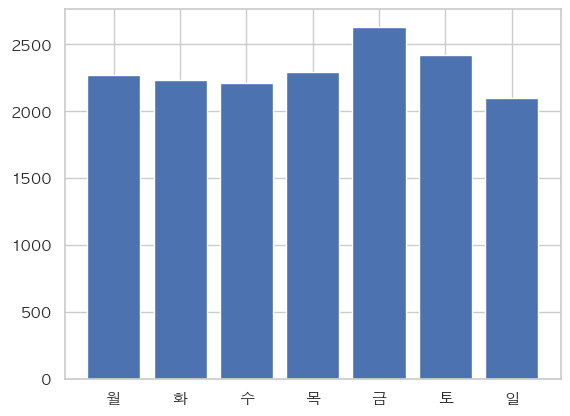

In [30]:
print( '요일별 교통량 (00~24시 통합)')
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8

plt.bar(x=time_target3.index,height=time_target3.values)

# 시간별 교통량

### 시간

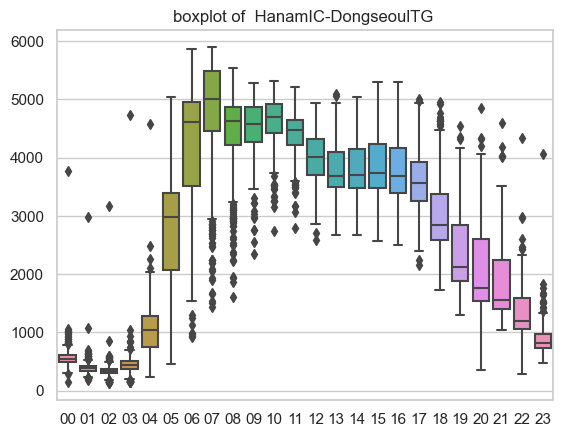

In [31]:
sns.set(style="whitegrid")
sns.boxplot(data=time_hd.iloc[:,4:28])
plt.title("boxplot of  HanamIC-DongseoulTG ")

#sns.boxplot(data=time_ds.iloc[:,4:28])
#plt.title("boxplot of  DongseoulTG-SangokJC ")

#sns.boxplot(data=time_sg.iloc[:,4:28])
#plt.title("boxplot of  SangokJC - Gyeonggi-GwangjuIC ")

plt.show()

<Figure size 640x480 with 0 Axes>

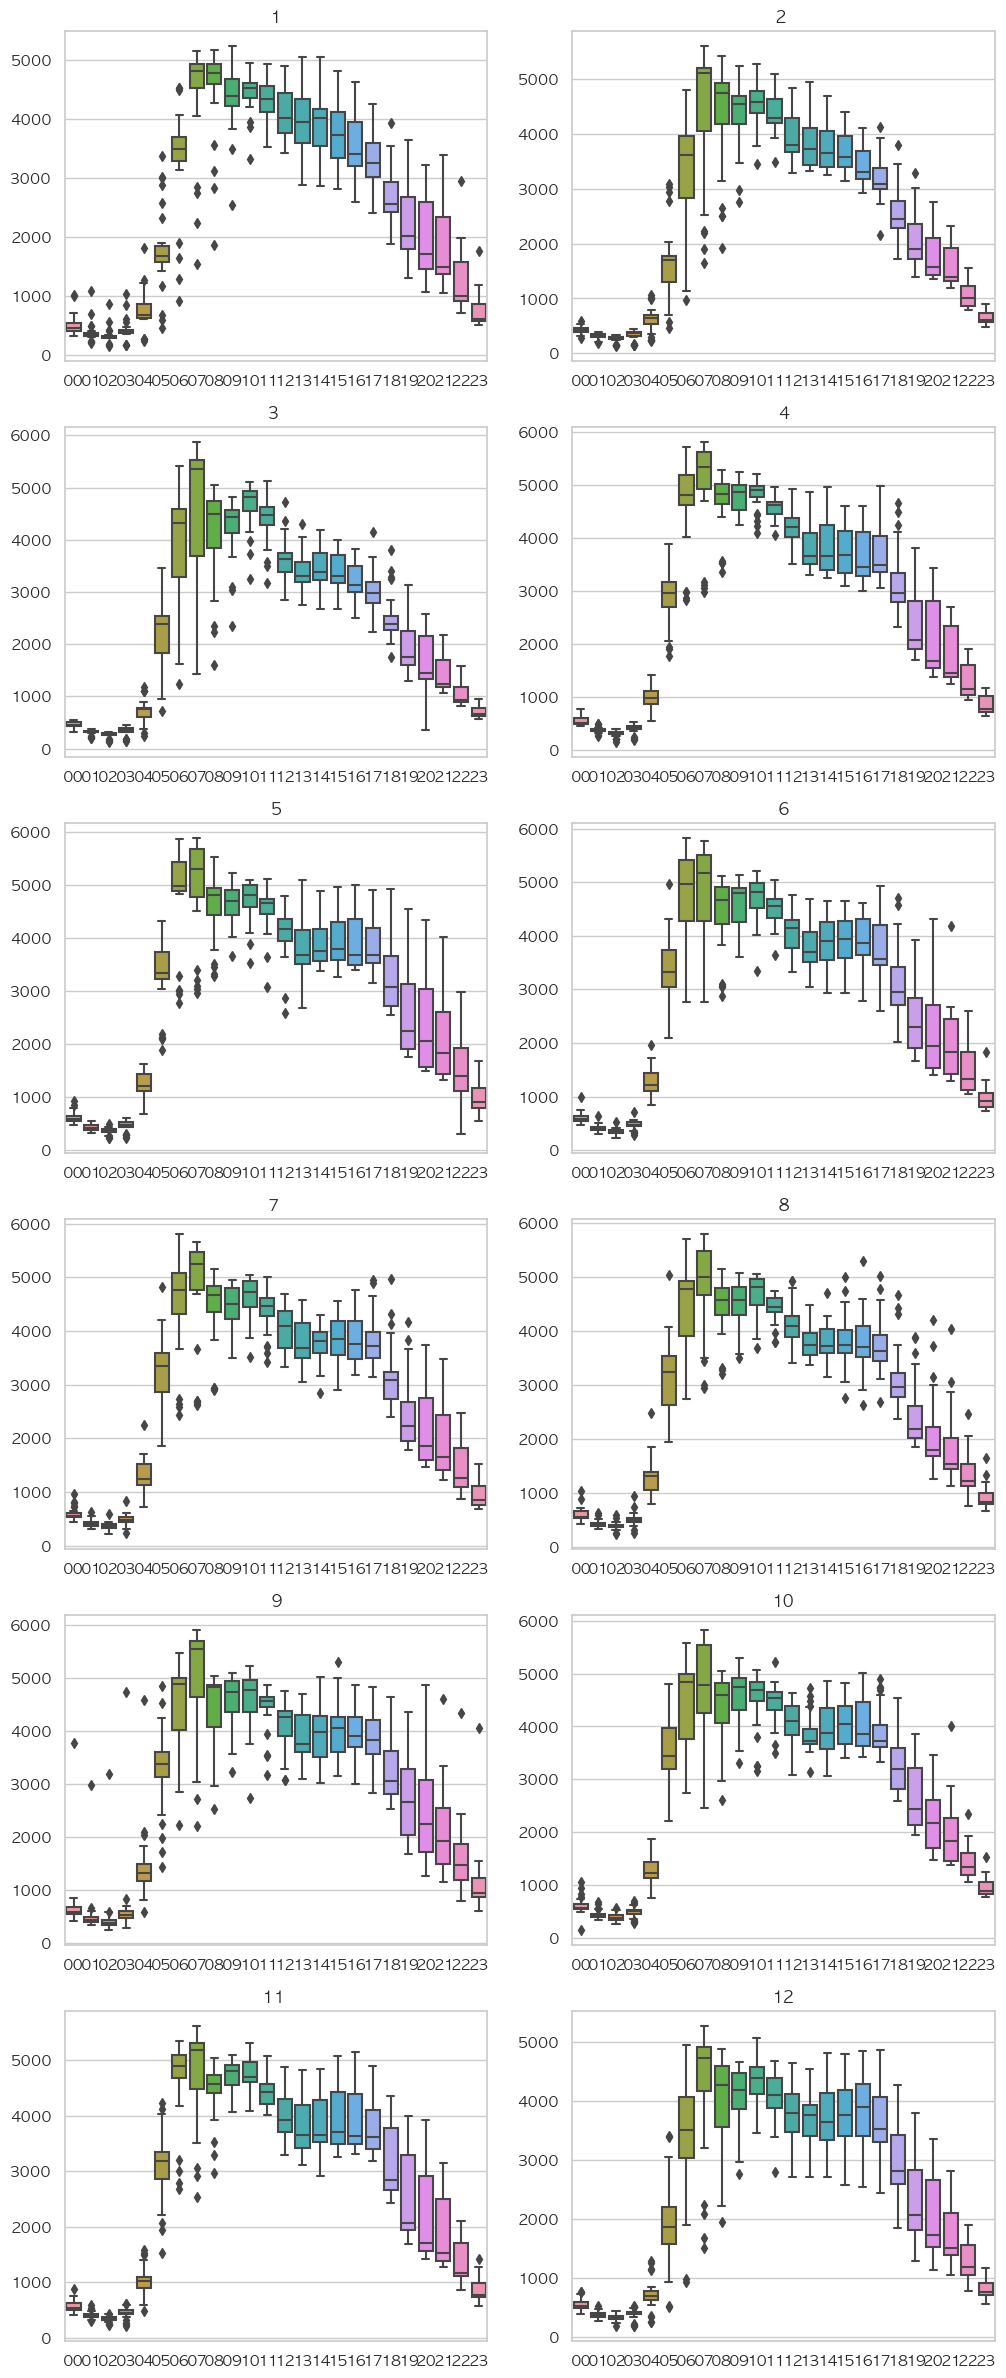

In [32]:
# 시간대별 교통량 (월별로 나타냄)
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15

fg=plt.figure()
fg,ax=plt.subplots(6,2,figsize=(12,30))
sns.set(style="whitegrid")

selected_columns=['00', '01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', 
                               '13', '14', '15', '16', '17', '18', '19','20', '21', '22', '23']


sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==1],ax=ax[0,0])
ax[0,0].set_title("1")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==2],ax=ax[0,1])
ax[0,1].set_title("2 ")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==3],ax=ax[1,0])
ax[1,0].set_title("3 ")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==4],ax=ax[1,1])
ax[1,1].set_title("4")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==5],ax=ax[2,0])
ax[2,0].set_title("5")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==6],ax=ax[2,1])
ax[2,1].set_title("6")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==7],ax=ax[3,0])
ax[3,0].set_title("7 ")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==8],ax=ax[3,1])
ax[3,1].set_title("8")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==9],ax=ax[4,0])
ax[4,0].set_title("9")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==10],ax=ax[4,1])
ax[4,1].set_title("10")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==11],ax=ax[5,0])
ax[5,0].set_title("11 ")
sns.boxplot(data=time_hd.iloc[:,4:28][time_hd['월']==12],ax=ax[5,1])
ax[5,1].set_title("12")



plt.show()

<Figure size 640x480 with 0 Axes>

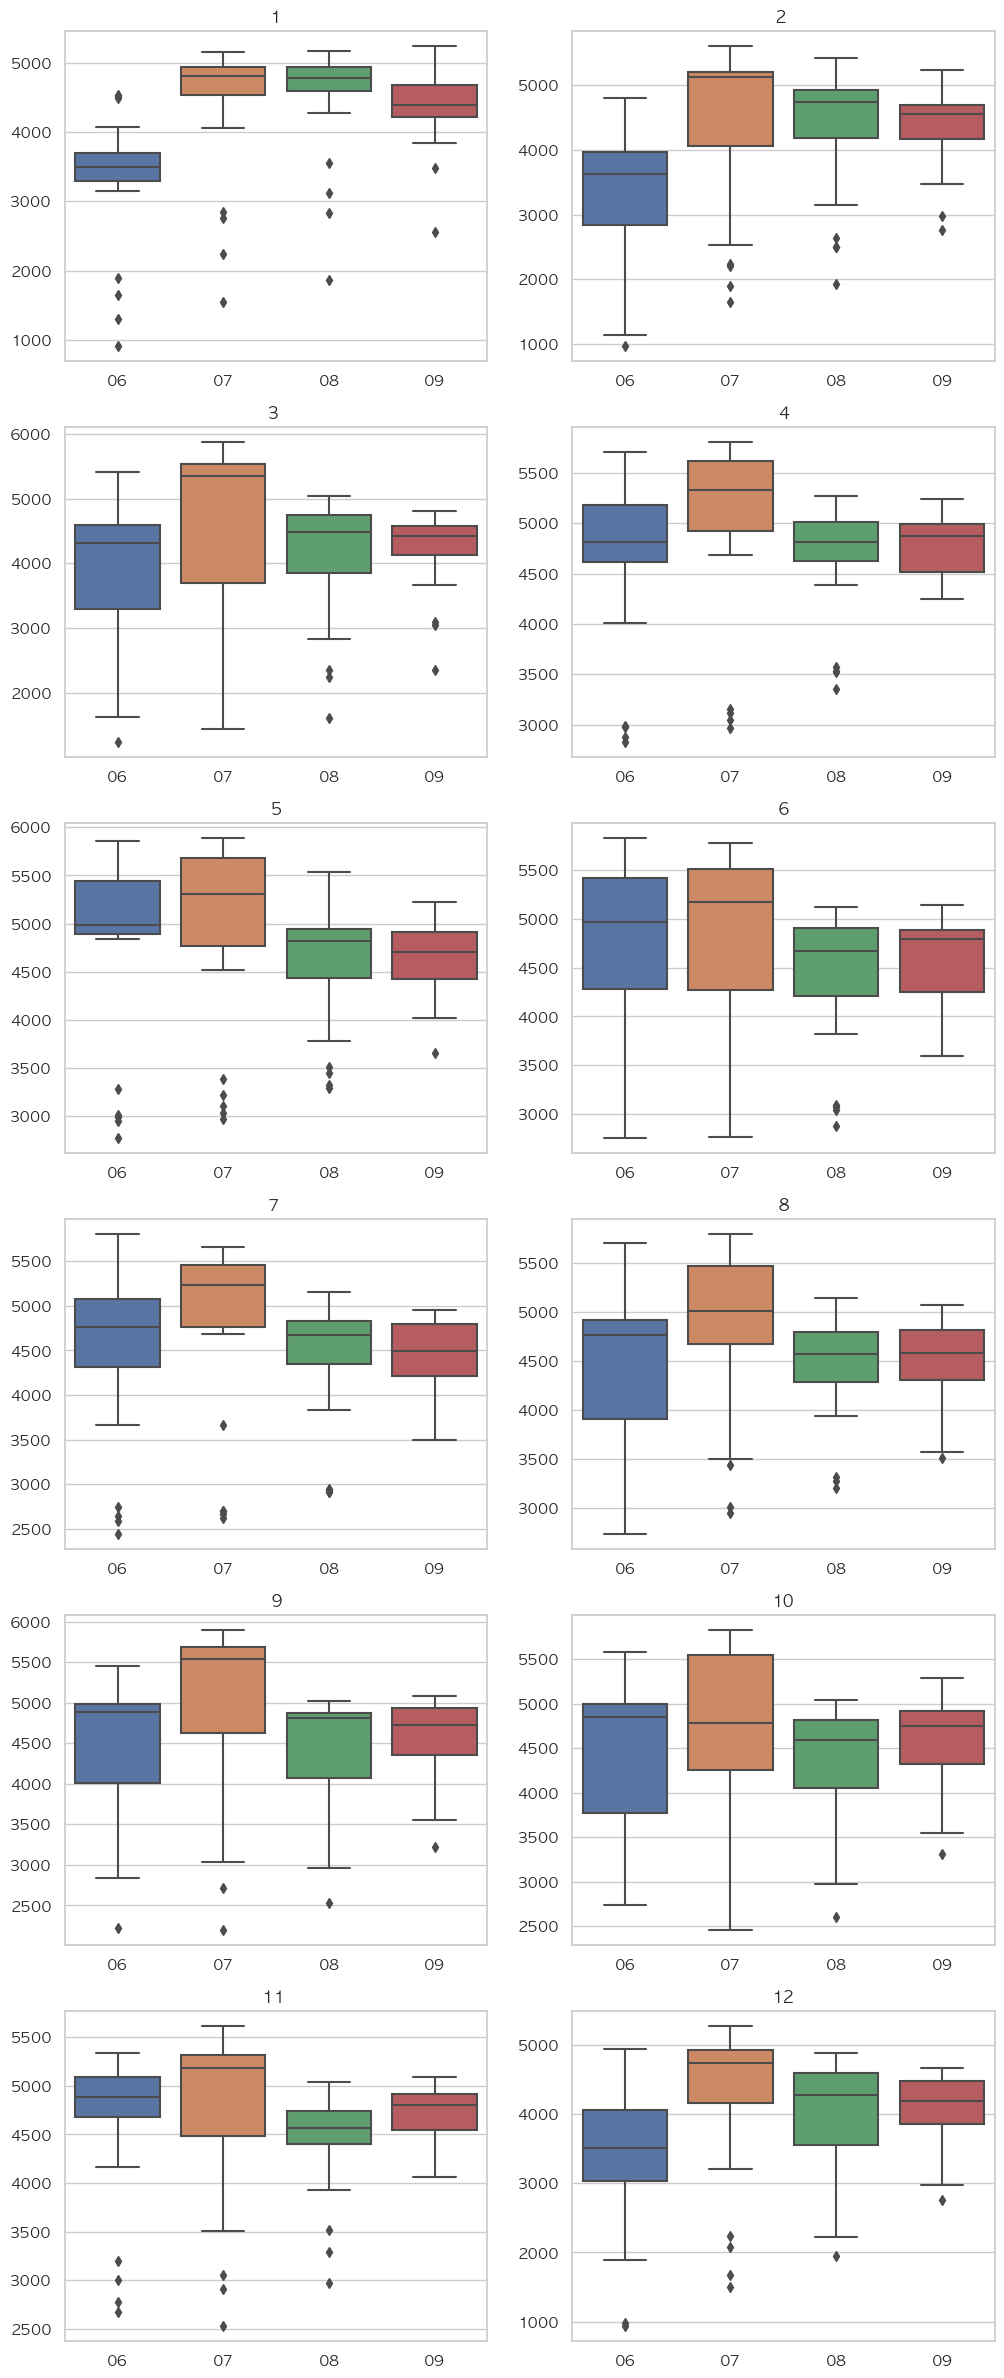

In [33]:
# 등교 시간인 06~09시 까지 교통량 (월별로 나타냄)

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15

fg=plt.figure()
fg,ax=plt.subplots(6,2,figsize=(12,30))
sns.set(style="whitegrid")

selected_columns=['00', '01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', 
                               '13', '14', '15', '16', '17', '18', '19','20', '21', '22', '23']


sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==1],ax=ax[0,0])
ax[0,0].set_title("1")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==2],ax=ax[0,1])
ax[0,1].set_title("2 ")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==3],ax=ax[1,0])
ax[1,0].set_title("3 ")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==4],ax=ax[1,1])
ax[1,1].set_title("4")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==5],ax=ax[2,0])
ax[2,0].set_title("5")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==6],ax=ax[2,1])
ax[2,1].set_title("6")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==7],ax=ax[3,0])
ax[3,0].set_title("7 ")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==8],ax=ax[3,1])
ax[3,1].set_title("8")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==9],ax=ax[4,0])
ax[4,0].set_title("9")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==10],ax=ax[4,1])
ax[4,1].set_title("10")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==11],ax=ax[5,0])
ax[5,0].set_title("11 ")
sns.boxplot(data=time_hd.iloc[:,10:14][time_hd['월']==12],ax=ax[5,1])
ax[5,1].set_title("12")



plt.show()

In [34]:
time_hd.columns

Index(['구간명', '날짜', '월', '요일', '00', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '전일합계(대)'],
      dtype='object')

# 월 교통량

In [35]:
#index = 시간  , column=월
time_hd_month=time_hd.groupby(time_hd['월'])[['00', '01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', 
                               '13', '14', '15', '16', '17', '18', '19','20', '21', '22', '23']].mean().round(2)
time_hd_month=time_hd_month.transpose()
time_hd_month

월,1,2,3,4,5,6,7,8,9,10,11,12
00,503.89,427.62,452.93,555.93,609.10,607.74,593.39,597.97,755.00,603.28,573.97,550.94
01,381.63,306.69,318.30,382.37,417.93,414.70,413.82,425.57,555.57,440.52,411.50,379.45
02,330.74,261.19,274.07,315.60,347.27,348.96,362.29,385.53,507.61,380.21,350.17,333.61
03,424.67,327.65,345.90,407.17,451.87,475.65,480.54,509.73,697.96,484.93,452.60,397.97
04,766.30,618.73,727.87,999.30,1210.10,1264.57,1288.71,1303.70,1454.48,1239.17,1027.73,721.94
05,1794.37,1669.19,2260.20,2912.87,3322.13,3328.00,3245.71,3144.40,3266.35,3398.52,3109.00,1898.61
06,3331.85,3306.92,3945.07,4697.70,4845.20,4672.30,4520.68,4480.43,4460.09,4506.48,4630.83,3408.61
07,4434.33,4400.88,4630.63,5063.77,4995.33,4767.65,4848.75,4877.93,4844.91,4685.83,4777.50,4289.84
08,4505.59,4305.42,4105.23,4696.67,4589.50,4404.30,4428.00,4467.70,4393.87,4334.72,4455.90,3965.13
09,4378.52,4347.00,4226.33,4776.27,4644.07,4556.65,4426.04,4502.87,4513.13,4601.62,4720.23,4084.81


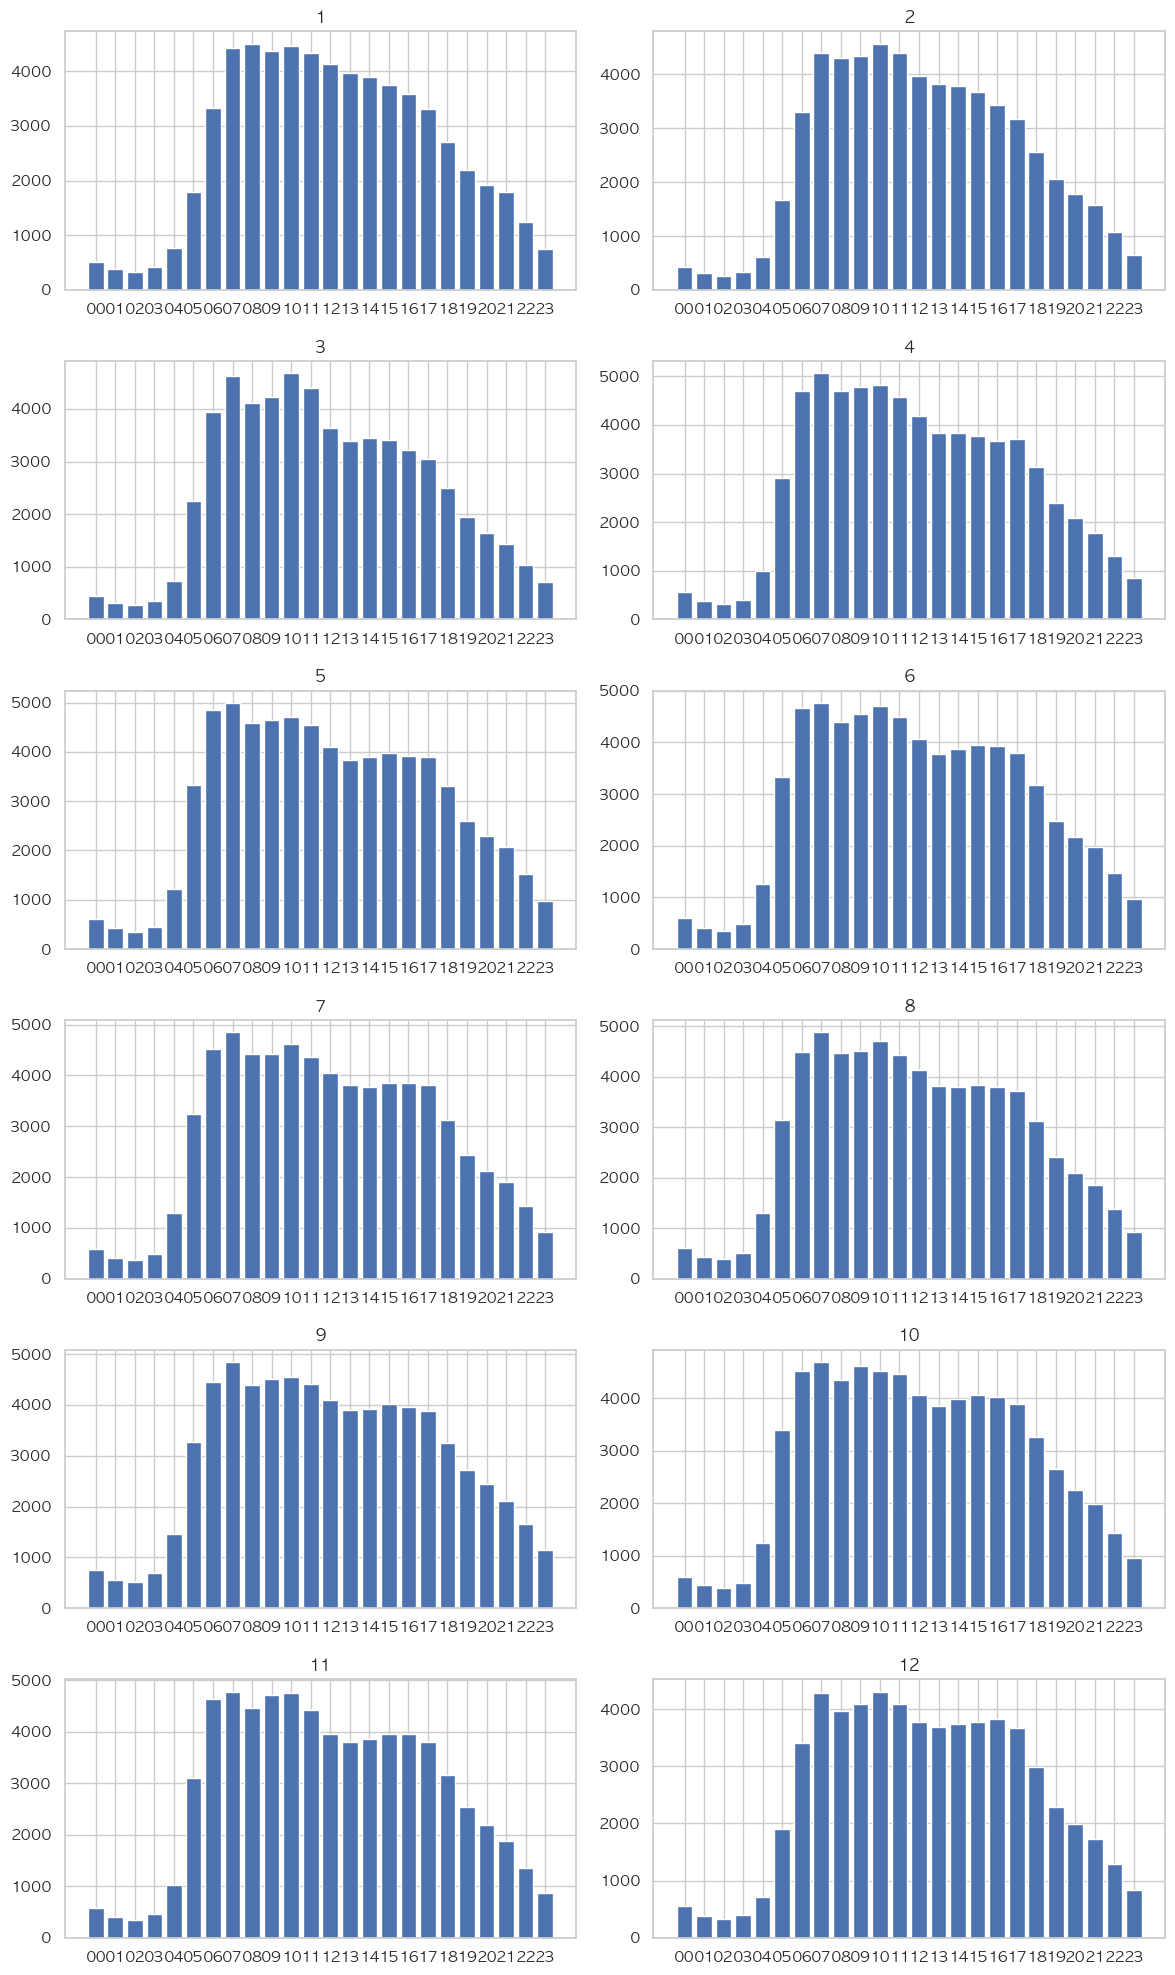

In [36]:
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15

plt.figure(figsize=(12,20))

for index,value in enumerate(time_hd_month.columns):
    sub=plt.subplot(6,2,index+1)
    
    sub.bar(x=time_hd_month.index,height=time_hd_month.iloc[:,index])
    plt.title(value)
    plt.tight_layout()
plt.show()

# 요일별 교통량

In [37]:
#index = 시간  , column=월
time_hd_day=time_hd.groupby(time_hd['요일'])[['00', '01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', 
                               '13', '14', '15', '16', '17', '18', '19','20', '21', '22', '23']].mean().round(2)
time_hd_day=time_hd_day.transpose()
time_hd_day=time_hd_day[['월','화','수','목','금','토','일']]

time_hd_day

요일,월,화,수,목,금,토,일
00,600.23,496.88,510.72,514.07,591.61,743.96,497.08
01,407.70,376.40,377.65,377.39,446.10,503.71,317.64
02,352.15,330.58,338.54,338.98,410.82,421.75,238.12
03,507.55,443.02,419.76,440.30,540.59,535.73,267.04
04,1344.98,969.80,944.15,1011.70,1097.16,1262.59,679.46
05,3467.15,2730.48,2608.22,2814.82,2819.27,3182.69,1809.96
06,4894.62,4380.14,4278.70,4510.05,4420.00,4563.37,2665.36
07,4726.94,5200.52,5122.80,5387.86,5228.41,4571.98,2919.26
08,4456.49,4696.66,4667.09,4769.30,4608.47,4304.27,3277.08
09,4456.87,4652.54,4588.72,4714.41,4646.96,4305.80,4040.66


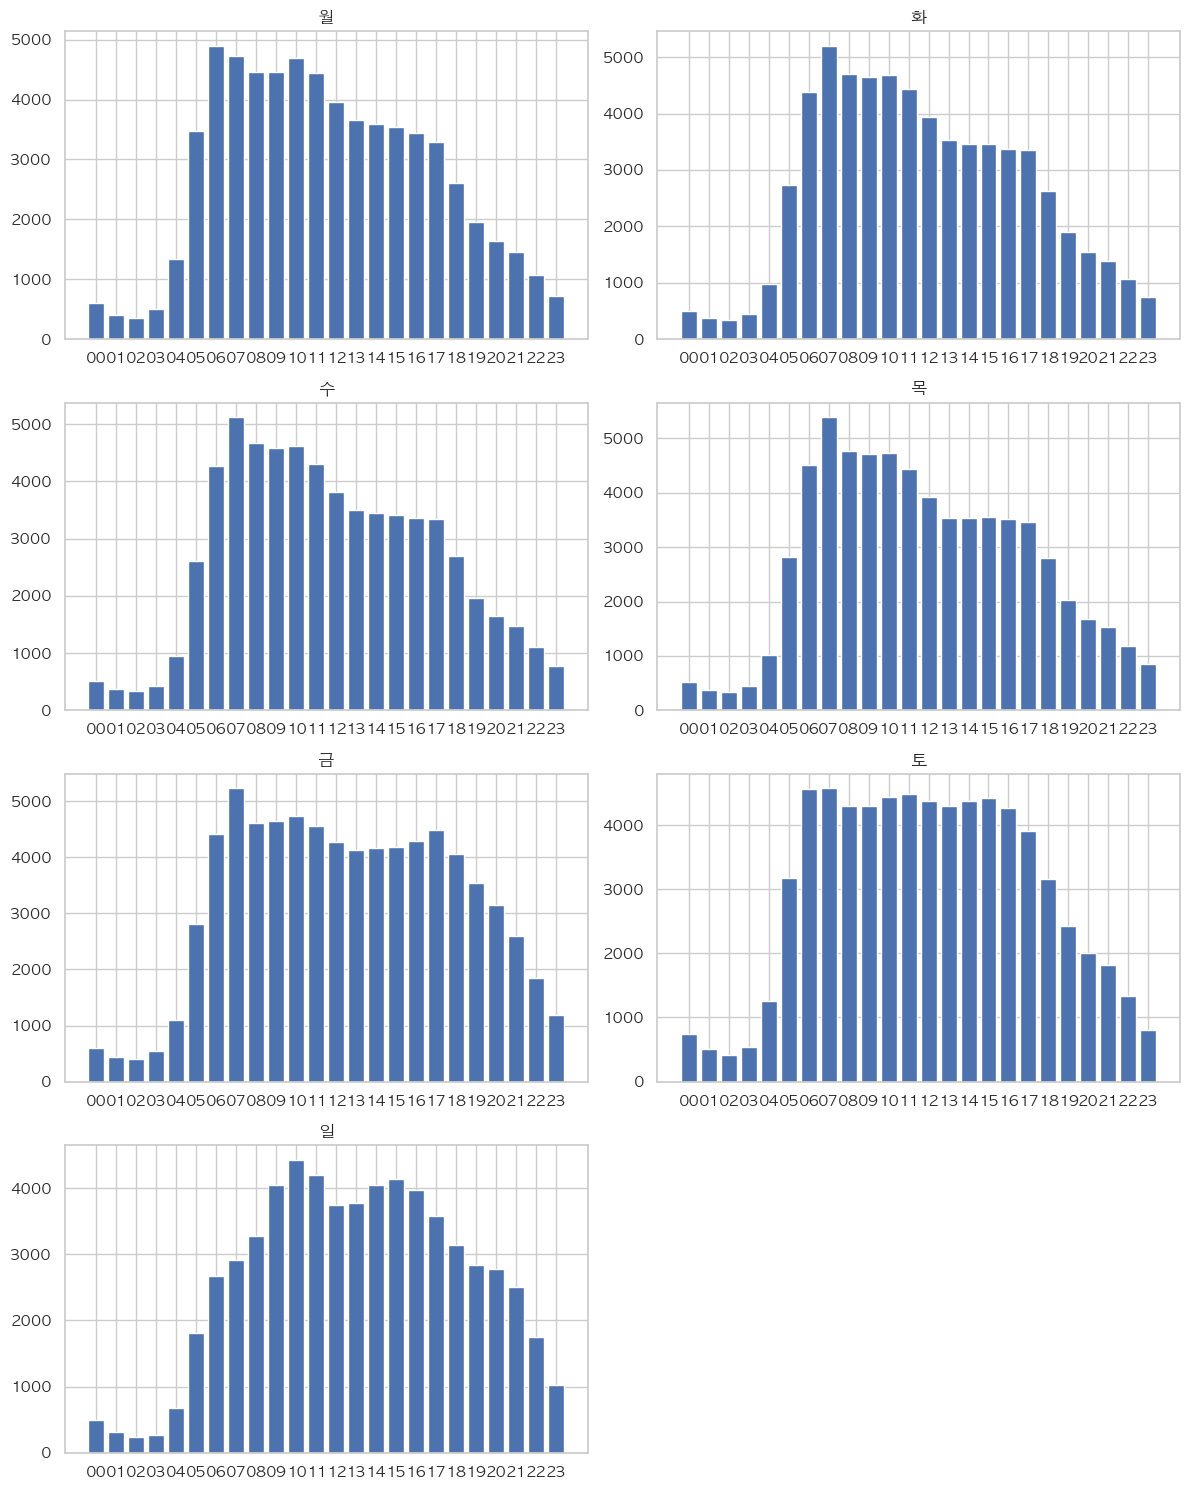

In [38]:
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 10

plt.figure(figsize=(12,15))

for index,value in enumerate(time_hd_day.columns):
    sub=plt.subplot(4,2,index+1)
    
    sub.bar(x=time_hd_day.index,height=time_hd_day.iloc[:,index])
    plt.title(value)
    plt.tight_layout()
plt.show()

In [39]:
df=pd.read_csv('data/5분당_교통량(등교)통합.csv')
df

,집계일자,집계시분,콘존ID,교통량,평균속도,통행시간,통행시간최대값,통행시간중위값,통행시간최소값,출발노드이름,도착노드이름,요일
0,2022-01-01,0,0352CZS400,35,95.51,186,213,186,162,산곡JC,경기광주IC,토
1,2022-01-01,0,0352CZS410,92,93.06,163,172,162,155,동서울TG,산곡JC,토
2,2022-01-01,0,0352CZS420,100,86.75,41,44,41,38,하남IC,동서울TG,토
3,2022-01-01,5,0352CZS400,39,92.57,192,209,195,178,산곡JC,경기광주IC,토
4,2022-01-01,5,0352CZS410,72,96.58,157,177,157,146,동서울TG,산곡JC,토
...,...,...,...,...,...,...,...,...,...,...,...,...
273883,2022-12-31,2350,0352CZS410,43,98.41,155,178,155,137,동서울TG,산곡JC,토
273884,2022-12-31,2350,0352CZS420,57,98.40,36,42,36,33,하남IC,동서울TG,토
273885,2022-12-31,2355,0352CZS400,35,106.26,167,181,168,154,산곡JC,경기광주IC,토
273886,2022-12-31,2355,0352CZS410,45,99.56,152,165,151,144,동서울TG,산곡JC,토


In [40]:
df1=df[df['집계시분']>=600]
df1=df1[df1['집계시분']<=1000]
df1

,집계일자,집계시분,콘존ID,교통량,평균속도,통행시간,통행시간최대값,통행시간중위값,통행시간최소값,출발노드이름,도착노드이름,요일
216,2022-01-01,600,0352CZS400,41,99.74,178,192,178,168,산곡JC,경기광주IC,토
217,2022-01-01,600,0352CZS410,123,98.23,154,168,155,144,동서울TG,산곡JC,토
218,2022-01-01,600,0352CZS420,122,84.54,42,47,42,40,하남IC,동서울TG,토
219,2022-01-01,605,0352CZS400,58,98.45,180,188,179,176,산곡JC,경기광주IC,토
220,2022-01-01,605,0352CZS410,107,95.69,158,172,157,153,동서울TG,산곡JC,토
...,...,...,...,...,...,...,...,...,...,...,...,...
273382,2022-12-31,955,0352CZS410,331,88.01,173,213,166,158,동서울TG,산곡JC,토
273383,2022-12-31,955,0352CZS420,360,82.84,43,47,43,39,하남IC,동서울TG,토
273384,2022-12-31,1000,0352CZS400,194,91.12,194,200,194,187,산곡JC,경기광주IC,토
273385,2022-12-31,1000,0352CZS410,347,87.52,174,196,172,161,동서울TG,산곡JC,토


In [41]:
#도로별로 나누기
df_hd=df1[df1['출발노드이름']=='하남IC'].copy()
df_ds=df1[df1['출발노드이름']=='동서울TG'].copy()
df_sg=df1[df1['출발노드이름']=='산곡JC'].copy()

In [42]:
df_hd[['교통량','평균속도','통행시간','통행시간최대값','통행시간중위값','통행시간최소값']].describe()

,교통량,평균속도,통행시간,통행시간최대값,통행시간중위값,통행시간최소값
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,370.370437,71.920655,57.427863,68.262860,57.143630,49.662139
std,80.067805,18.793839,36.582479,58.051358,35.991286,23.645423
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,337.000000,71.950000,43.000000,47.000000,43.000000,40.000000
50%,386.000000,78.050000,45.000000,50.000000,45.000000,42.000000
75%,422.000000,82.310000,49.000000,57.000000,49.000000,45.000000
max,559.000000,102.540000,584.000000,900.000000,624.000000,437.000000


In [43]:
df_ds[['교통량','평균속도','통행시간','통행시간최대값','통행시간중위값','통행시간최소값']].describe()

,교통량,평균속도,통행시간,통행시간최대값,통행시간중위값,통행시간최소값
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,344.968905,71.837686,238.297946,276.886242,235.588425,210.600657
std,83.166905,20.616765,106.089080,152.578916,102.887797,75.904923
min,40.000000,8.360000,136.000000,142.000000,134.000000,126.000000
25%,301.000000,51.470000,174.000000,187.000000,173.000000,162.000000
50%,349.000000,78.190000,194.000000,215.000000,194.000000,179.000000
75%,396.000000,87.260000,299.000000,352.000000,291.000000,260.000000
max,545.000000,111.660000,2064.000000,3361.000000,1977.000000,1341.000000


In [44]:
df_sg[['교통량','평균속도','통행시간','통행시간최대값','통행시간중위값','통행시간최소값']].describe()

,교통량,평균속도,통행시간,통행시간최대값,통행시간중위값,통행시간최소값
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,202.645207,83.007239,224.641731,247.975793,223.587781,206.575484
std,53.136488,12.960665,83.145588,112.980236,81.180774,63.200110
min,19.000000,9.910000,155.000000,161.000000,154.000000,140.000000
25%,173.000000,78.430000,198.000000,214.000000,198.000000,185.000000
50%,216.000000,83.470000,213.000000,230.000000,212.000000,198.000000
75%,243.000000,89.360000,226.000000,248.000000,226.000000,211.000000
max,312.000000,114.540000,1807.000000,2364.000000,1834.000000,1538.000000


In [45]:
print('하남IC-동서울TG')
df_hd_t=df_hd.groupby(df_hd['집계시분'])[['교통량','평균속도']].mean()
df_hd_t

하남IC-동서울TG


,교통량,평균속도
집계시분,,
600,306.444795,82.370631
605,317.681388,81.636215
610,330.432177,80.739685
615,337.438486,80.123943
620,348.586751,79.228833
625,351.403785,78.850126
630,353.933754,78.163880
635,365.864353,77.291388
640,366.596215,76.708360


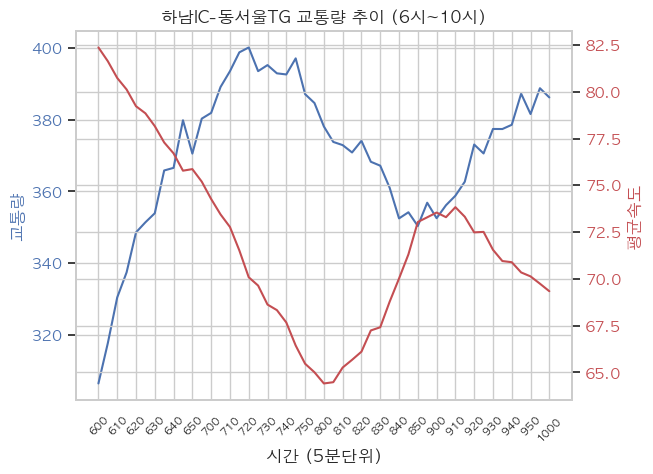

In [87]:
import matplotlib.pyplot as plt
import numpy as np


# 첫 번째 y축에 대한 꺾은선 그래프 그리기
fig, ax1 = plt.subplots()


ax1.set_xlabel('시간 (5분단위)')
ax1.set_ylabel('교통량', color='b')
ax1.plot(df_hd_t.index.astype(str), df_hd_t['교통량'].values,color='b')  #astype(str)은 데이터프레임 전체를 str으로 바꿈
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(df_hd_t.index.astype(str)[::2])
ax1.set_xticklabels(df_hd_t.index.astype(str)[::2], rotation=45, fontsize = 8)

# 두 번째 y축에 대한 꺾은선 그래프 그리기
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 y축 생성

ax2.set_ylabel('평균속도', color='r')
ax2.plot(df_hd_t.index.astype(str), df_hd_t['평균속도'].values,color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('하남IC-동서울TG 교통량 추이 (6시~10시)')

plt.show()


In [77]:
print('동서울TG-산곡JC')
df_ds_t=df_ds.groupby(df_ds['집계시분'])[['교통량','평균속도']].mean()
df_ds_t

동서울TG-산곡JC


,교통량,평균속도
집계시분,,
600,275.277603,89.004196
605,283.832808,87.768013
610,293.889590,86.534543
615,302.558360,85.323785
620,310.302839,84.136057
625,315.946372,82.841861
630,319.750789,81.694069
635,323.694006,80.374921
640,329.861199,79.566341


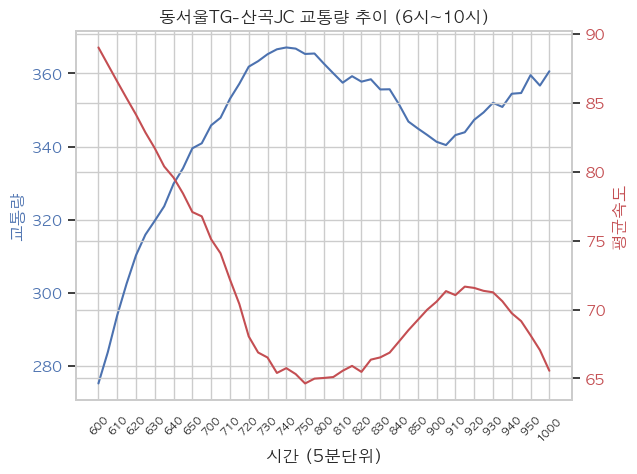

In [81]:
import matplotlib.pyplot as plt
import numpy as np


# 첫 번째 y축에 대한 꺾은선 그래프 그리기
fig, ax1 = plt.subplots()


ax1.set_xlabel('시간 (5분단위)')
ax1.set_ylabel('교통량', color='b')
ax1.plot(df_ds_t.index.astype(str), df_ds_t['교통량'].values,color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(df_ds_t.index.astype(str)[::2])
ax1.set_xticklabels(df_ds_t.index.astype(str)[::2], rotation=45, fontsize = 8)

# 두 번째 y축에 대한 꺾은선 그래프 그리기
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 y축 생성

ax2.set_ylabel('평균속도', color='r')
ax2.plot(df_ds_t.index.astype(str), df_ds_t['평균속도'].values,color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('동서울TG-산곡JC 교통량 추이 (6시~10시)')

plt.show()


In [49]:
print('산곡JC-경기광주IC')
df_sg_t=df_sg.groupby(df_sg['집계시분'])[['교통량','평균속도']].mean()
df_sg_t

산곡JC-경기광주IC


,교통량,평균속도
집계시분,,
600,153.728707,90.764290
605,159.665615,90.172082
610,166.400631,89.192618
615,173.507886,88.329937
620,178.466877,87.550631
625,183.993691,87.156909
630,184.880126,86.718328
635,189.233438,86.617571
640,194.056782,86.070473


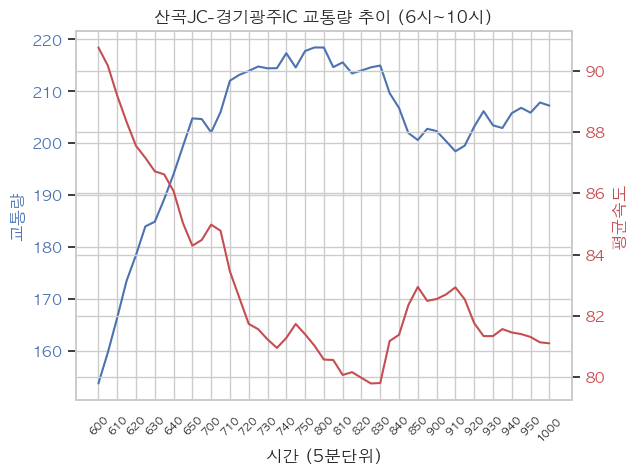

In [83]:
import matplotlib.pyplot as plt
import numpy as np


# 첫 번째 y축에 대한 꺾은선 그래프 그리기
fig, ax1 = plt.subplots()


ax1.set_xlabel('시간 (5분단위)')
ax1.set_ylabel('교통량', color='b')
ax1.plot(df_sg_t.index.astype(str), df_sg_t['교통량'].values,color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(df_sg_t.index.astype(str)[::2])
ax1.set_xticklabels(df_sg_t.index.astype(str)[::2], rotation=45, fontsize = 8)

# 두 번째 y축에 대한 꺾은선 그래프 그리기
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 y축 생성

ax2.set_ylabel('평균속도', color='r')
ax2.plot(df_sg_t.index.astype(str), df_sg_t['평균속도'].values,color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('산곡JC-경기광주IC 교통량 추이 (6시~10시)')

plt.show()


# 통과시간 계산

In [93]:
node=pd.DataFrame({ '노드명':['하남IC','동서울TG','산곡JC'],'거리(km)':[1.000,4.230,4.940]})
node

,노드명,거리(km)
0,하남IC,1.00
1,동서울TG,4.23
2,산곡JC,4.94


In [106]:
start=600        #고속도로 진입 시간  (600~1000)

time_h=((node.iloc[0,1]/df_hd_t.loc[start][1]))*60   #거리/속력 =시간
time_d=((node.iloc[1,1]/df_ds_t.loc[start][1]))*60
time_s=((node.iloc[2,1]/df_sg_t.loc[start][1]))*60
time_h+time_d+time_s

6.845567404087454

In [286]:
def minute_cal(t,road,node_name): #시간을 입력받음
    r=road   #노드
    n=node[node['노드명']==node_name].index[0]  #
    time_five=600+int(((t-600)//5)*5)  #start는 속도를 찾기위한 5의 배수 시간
    if time_five%100>=60:  
        time_five=(time_five//100)*100+100+int(time_five%100-60)
    moving_time=((node.iloc[n,1]/r.loc[time_five][1]))*60   #걸린 시간
    t=t+moving_time   #총 시간
    return t

In [296]:
start=730
a=minute_cal(start,df_hd_t,'하남IC')
b=minute_cal(a,df_ds_t,'동서울TG')
c=minute_cal(b,df_sg_t,'산곡JC')
print(a,b,c)
print(f'출발 시간 : {start}, 도착 시간 : {c:.2f} , 총 소요시간 : {(c-start):.4f}')

730.8743287963545 734.689740756667 738.3386885445127
출발 시간 : 730, 도착 시간 : 738.34 , 총 소요시간 : 8.3387


In [354]:
h_road=pd.read_csv('data/회안도로 길이.csv')
h_road['LENGTH']=h_road['LENGTH']*0.001
h_road

,LINK_ID,LENGTH
0,2.340008e+09,0.109424
1,2.340008e+09,0.110813
2,2.340010e+09,0.209136
3,2.340010e+09,0.118178
4,2.340010e+09,0.214763
...,...,...
172,2.340623e+09,0.150760
173,2.340623e+09,0.152935
174,2.340623e+09,0.187158
175,2.340623e+09,0.187788


In [355]:
h_road['LENGTH'].sum()  #총 거리

44.942489490913815

In [351]:
road_speed=pd.read_csv('data/회안도로 속도.csv')
road_speed.set_index('time',inplace=True)
road_speed

,LINK_ID,speed
time,,
600,2.340008e+09,48.837500
605,2.340008e+09,46.912500
615,2.340008e+09,49.625000
625,2.340008e+09,46.675000
635,2.340008e+09,45.937500
...,...,...
1025,2.340623e+09,54.375000
1035,2.340623e+09,56.187500
1045,2.340623e+09,54.357143


In [332]:
def minute_cal2(t,link_id): #시간을 입력받음
    n=h_road[h_road['LINK_ID']==link_id].index[0]
    time_five=605+int(((t-605)//10)*10)  #start는 속도를 찾기위한 10의 배수 시간
    if time_five%100>=60:  
        time_five=(time_five//100)*100+100+int(time_five%100-60)
    print(time_five)
    moving_time=((h_road.iloc[n,1]/road_speed[road_speed['LINK_ID']==link_id].loc[time_five][1]))*60   #거리/속력=걸린 시간
    t=t+moving_time   #총 시간
    print(t)
    return t

In [329]:
start=605   #시작 6:05부터
a=minute_cal2(start,2340007900)
b=minute_cal2(a,2340008000)
c=minute_cal2(b,2340010104)
d=minute_cal2(c,2340010105)

print(f'출발 시간 : {start}, 도착 시간 : {d:.2f} , 총 소요시간 : {(d-start):.4f}')

605.1399508833176
605.3429668700138
605.6126028340775
605.7526657167667
출발 시간 : 605, 도착 시간 : 605.75 , 총 소요시간 : 0.7527


In [349]:
def recal_fun(total_time,linkID,i):
    if i==177:
        linkid=h_road.loc[i-1][0]
        return minute_cal2(total_time,linkID)
    else:
        total=minute_cal2(total_time,linkID)
        linkid=h_road.loc[i][0]
        i=i+1
        return recal_fun(total,linkid,i)

In [350]:
start=800   #시작 6:05부터
i=1
lid=2340007900
final=recal_fun(start,lid,i)

print(f'출발 시간 : {start}, 도착 시간 : {final:.2f} , 총 소요시간 : {(final-start):.4f}')

835
800.1868216288433
835
800.3891756068872
835
800.7645486228841
835
800.9784916575952
835
801.4090419954183
835
801.4853103145646
835
802.0428040084578
835
802.1818361975666
835
802.3583338688201
835
802.7025426132764
835
802.770731783302
835
803.1057112692139
835
803.2265011746259
835
803.6766137147783
835
803.8391460207962
835
804.0919605383076
835
804.5453357324934
835
805.4211060747664
805
805.6383254199037
805
805.6782770060432
805
805.7133418515572
805
805.7693328959471
805
806.0468320550459
805
806.2511443117799
805
806.5220918947651
805
807.038822617703
805
807.8402821960063
805
808.0209770371779
805
808.0688280718457
805
808.1166357864216
805
808.2191944439029
805
808.6674292498864
805
809.0062345958572
805
809.0970757095549
805
809.1266145707403
805
809.3789646886041
805
809.6219689418649
805
809.7201226547427
805
810.1592936746918
805
810.2781328592263
805
810.3969720437608
805
810.4339513443299
805
810.7613059616883
805
811.1259509585193
805
811.259051072777
805
811.36159